Import required modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import squarify
from collections import defaultdict,Counter
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('IMDb Movies India.csv', encoding="latin1")

In [4]:
data.shape

(15509, 10)

In [5]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(6)

Data Cleaning

In [8]:
# find the total number of fields with null values
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
# delete the null values
data.dropna(inplace=True)

In [10]:
data.shape

(5659, 10)

In [11]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
# Drop the NULL values from the dataset
data.drop_duplicates(inplace=True)

data.duplicated().sum()

np.int64(0)

In [13]:
# Removing brackets from Years column
data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [14]:
# Removing commas from the vote column
data['Votes']=pd.to_numeric(data['Votes'].str.replace(',', ''))

In [15]:
# Removing min from the Duration column
data['Duration']=pd.to_numeric(data['Duration'].str.replace(' min', ''))

In [16]:
# Splitting the genre by ',' to keep only unique genres
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)

C:\Users\aarad\AppData\Local\Temp\ipykernel_9728\1441856149.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


Data Visulization

In [18]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


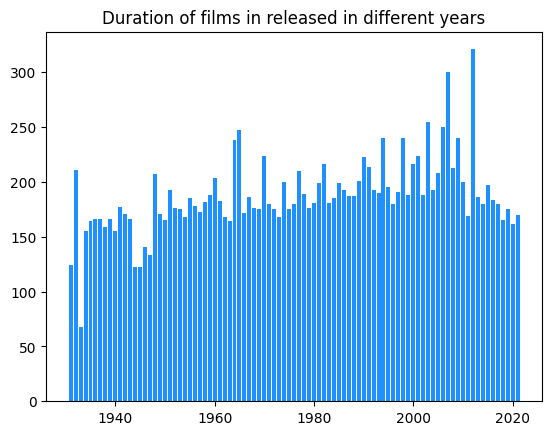

In [19]:
x = data['Year']
y = data['Duration']
plt.title('Duration of films in released in different years')
plt.bar(x, y, color='dodgerblue')
plt.show()

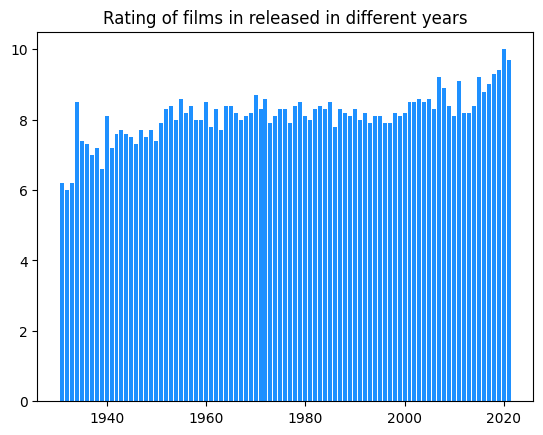

In [20]:
x = data['Year']
y = data['Rating']
plt.title('Rating of films in released in different years')
plt.bar(x, y, color='dodgerblue')
plt.show()

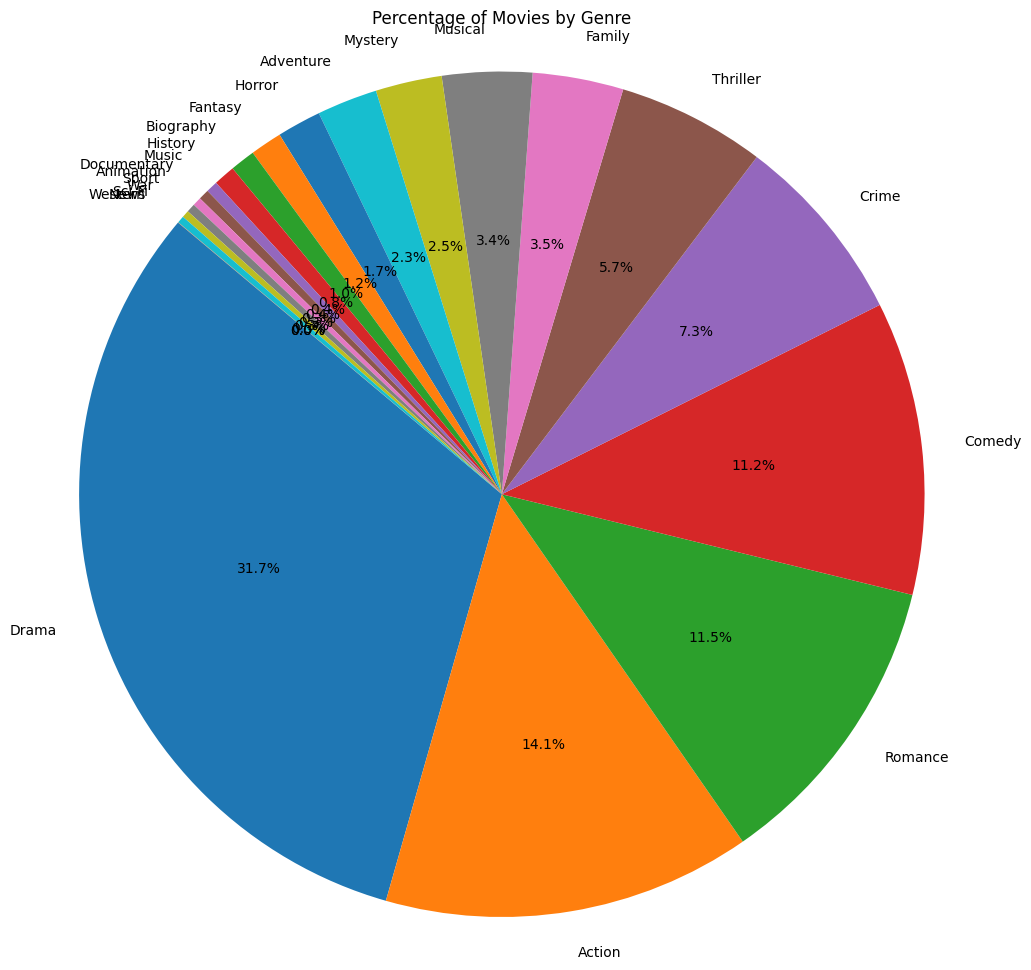

In [21]:
genre_counts = data['Genre'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(12, 12))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Movies by Genre')
plt.axis('equal')
plt.show()

In [22]:
# Top 10 movies based on ratings

# Extracted the required fields
extracted_data = data[['Name', 'Year', 'Duration', 'Rating', 'Director']]
# Droped the possible duplicate values present the extracted data
unique_combinations = extracted_data.drop_duplicates()
# Sort the result based on Rating to get the top movies based on Ratings
top_10_movies = unique_combinations.sort_values(by=['Rating'], ascending=False).head(10)
top_10_movies

,Name,Year,Duration,Rating,Director
8339,Love Qubool Hai,2020,94,10.0,Saif Ali Sayeed
5410,Half Songs,2021,79,9.7,Sriram Raja
14222,The Reluctant Crime,2020,113,9.4,Arvind Pratap
5077,Gho Gho Rani,2019,105,9.4,Munni Pankaj
6852,June,2021,93,9.4,Suhrud Godbole
5125,God of gods,2019,90,9.3,Venkatesh Bk
11843,Refl3ct,2021,65,9.3,Nikhil Mahar
1314,Ashok Vatika,2018,97,9.3,Rahul Mallick
12673,Secrets of Sinauli,2021,56,9.3,Raghav Jairath
1729,Baikunth,2021,72,9.3,Vishwa Bhanu


Feature Engineering

In [23]:
# dropping name as it does not affect the prediction
data.drop('Name', axis=1, inplace=True)

In [24]:
# Grouping the column based on the ratings

genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = genre_mean_rating

actor1_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Actor1_encoded'] = actor1_mean_rating
actor2_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Actor2_encoded'] = actor2_mean_rating
actor3_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Actor3_encoded'] = actor3_mean_rating

In [25]:
# Initializing the predictor and the target variable

x = data[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = data['Rating']

In [26]:
# Defining the traning and testing variables

train_x, test_x, train_y, test_y = tts(x, y, test_size=0.2, random_state=42)

Model Building

In [27]:
# Building and training the ML model

# Fit the model again
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_x, train_y)
model_pred = model.predict(test_x)
print(model_pred)

[3.982 6.484 7.358 ... 4.992 4.097 6.385]


Model Testing

In [28]:
x.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,6.056744,6.056744,6.056744,6.056744
3,2019,35,110,5.751042,5.751042,5.751042,5.751042,5.751042
3,2019,35,110,5.811087,5.811087,5.811087,5.811087,5.811087
5,1997,827,147,5.751042,5.751042,5.751042,5.751042,5.751042
5,1997,827,147,6.056744,6.056744,6.056744,6.056744,6.056744


In [29]:
y.head()

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [30]:
# Testing the values witha a sample dataset
 
data = {'Year': [2020], 'Votes': [40], 'Duration': [123], 'Genre_mean_rating': [5.7], 'Director_encoded': [5.9], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.7], 'Actor3_encoded': [5.8]}
trial1 = pd.DataFrame(data)

In [31]:
# Predict the movie rating with values of the sample data
rating_predicted = model.predict(trial1)
print(rating_predicted) 

[6.22]


In [ ]:
# Make predictions on the test data
test_pred = model.predict(test_x)

# Calculate performance metrics using test_pred and test_y
print("Performance of Regression test are as follows:", '\n')
print("Mean Absolute Error:", mean_absolute_error(test_y, test_pred))
print("Mean Squared Error:", mean_squared_error(test_y, test_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(test_y, test_pred)))
print("R2 Score = ", r2_score(test_y, test_pred))

Performance of Regression test are as follows: 

Mean Absolute Error: 0.6052438925987759
Mean Squared Error: 0.749338109722686
Root Mean Squared Error: 0.8656431769052916
R2 Score =  0.6041626834758793


                                                    Thank You                                                                         .